# Importing the Libraries and Dependencies

In [308]:
import pandas as pd
import numpy as ny
import mglearn
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.font_manager import FontProperties 
from matplotlib.ticker import AutoMinorLocator
import statsmodels.api as sm
import scipy.stats as st
import seaborn as sns
import seaborn as sbn
import matplotlib.mlab as mlab
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, precision_recall_curve, auc, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay


# Importing Dataset and Data Exploration

In [233]:
#importing and reading the data using pandas read_csv () Method

data = pd.read_csv(r'C:\Users\umehu\OneDrive\Desktop\ICA\ML\Heart_Disease.csv')

In [234]:
# viewing the first 5 rows of the data in a pd table

data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [235]:
# Showing Statistical description of data (mean, count, std, 25%, 50%, 75%, max)

data.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [236]:
#Removing missing value from the data set

count = 0
for i in data.isnull().sum(axis = 1):
    if i>0:
        count = count + 1
print("Total number of rows with missing values is:",count)
print("since it is only",round((count/len(data.index))* 100), "percent of the entire dataset the rows with missing values are excluded")

data.dropna(axis = 0, inplace = True)
data.describe()

Total number of rows with missing values is: 582
since it is only 14 percent of the entire dataset the rows with missing values are excluded


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [237]:
#information on each attribute and data type

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [238]:
#list of numerical attributes whoes Dtype is Int64 or Float64

numeric_features = ["sex", "age", "education", "currentSmoker", "cigsPerDay", "BPMeds",
                   "prevalentStroke", "diabetes", "totChol", "sysBP", "diaBP", "BMI",
                    "heartRate", "glucose", "TenYearCHD"]

In [239]:
#comfirm to ensure their is no existing null data
data.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [240]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
sex,3656.0,0.443654,0.496883,0.00,0.00,0.00,1.00,1.0
age,3656.0,49.557440,8.561133,32.00,42.00,49.00,56.00,70.0
education,3656.0,1.979759,1.022657,1.00,1.00,2.00,3.00,4.0
currentSmoker,3656.0,0.489059,0.499949,0.00,0.00,0.00,1.00,1.0
cigsPerDay,3656.0,9.022155,11.918869,0.00,0.00,0.00,20.00,70.0
BPMeds,3656.0,0.030361,0.171602,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3656.0,0.005744,0.075581,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3656.0,0.311543,0.463187,0.00,0.00,0.00,1.00,1.0
diabetes,3656.0,0.027079,0.162335,0.00,0.00,0.00,0.00,1.0
totChol,3656.0,236.873085,44.096223,113.00,206.00,234.00,263.25,600.0


# Data Visualization

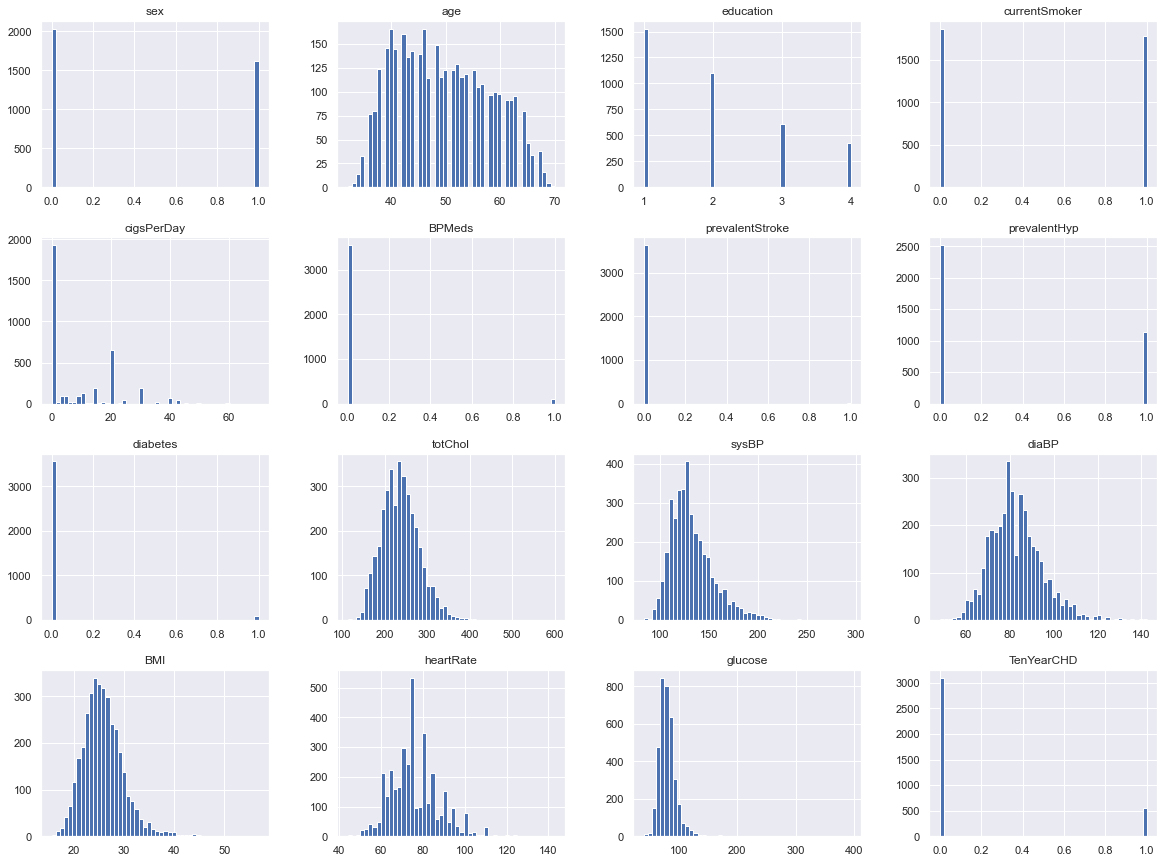

In [241]:
#Exploring the distribution of the numerical data

data.hist(bins=50, figsize=(20,15))
plt.show()

In [242]:
#Checking for correlation between the features and the target value.

data.corr()


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


In [243]:
data.corr()["TenYearCHD"].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.233810
sysBP              0.222885
prevalentHyp       0.181556
diaBP              0.150342
glucose            0.121942
diabetes           0.093397
sex                0.091745
totChol            0.091127
BPMeds             0.089116
BMI                0.081931
cigsPerDay         0.052159
prevalentStroke    0.048351
heartRate          0.020523
currentSmoker      0.019176
education         -0.063068
Name: TenYearCHD, dtype: float64

from the above value, people will be more susiptible to heart disease

if they are older

if they have higher systolic blood pressure

if they are hypertensive

if they have higher diastolic blood pressure

if they have higher glucose level glucose

if they have diabetes

if they are males

if they have a higher cholesterol

<Figure size 1800x1800 with 0 Axes>

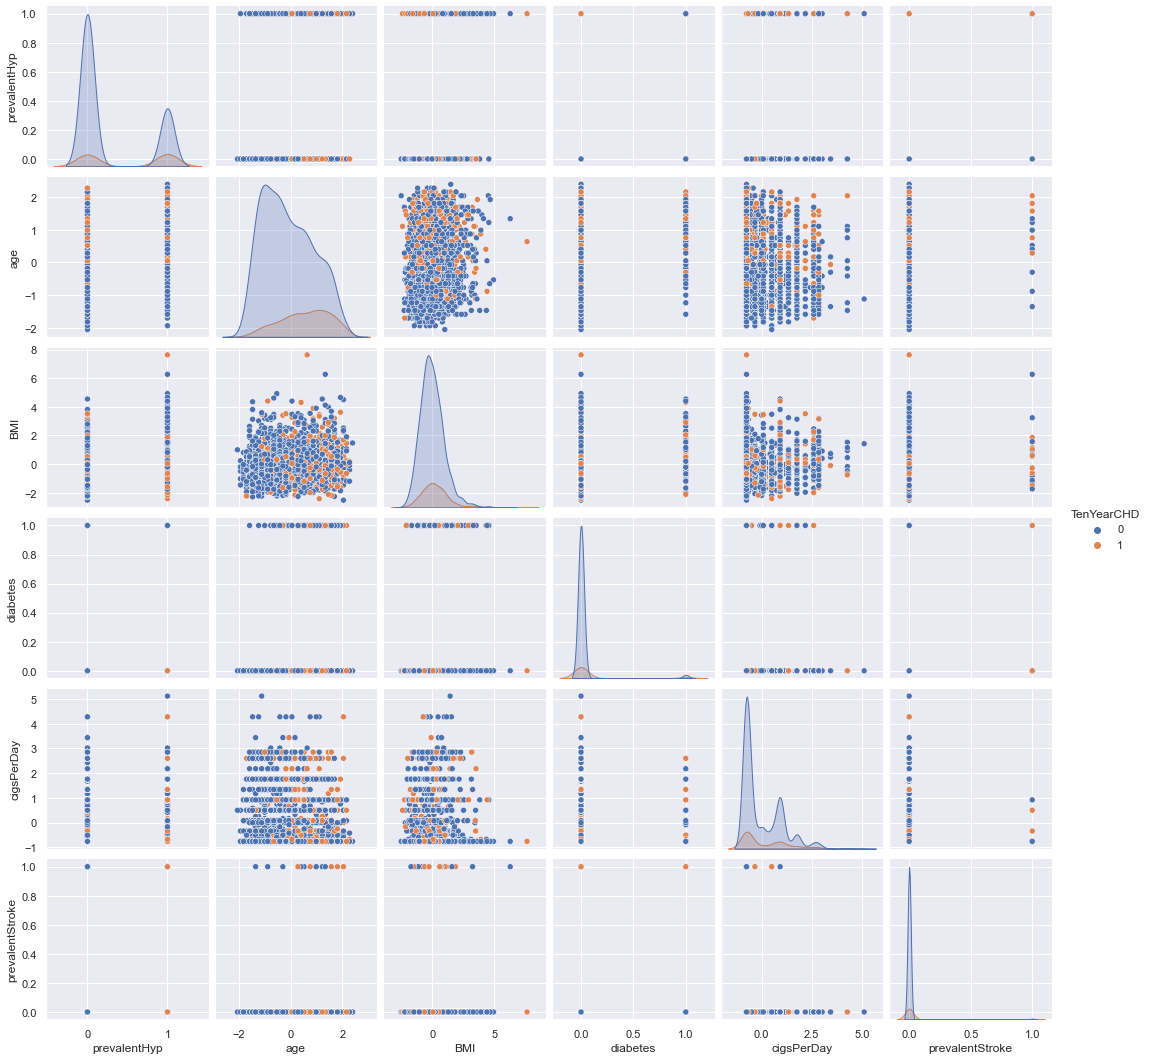

In [300]:
plt.figure(figsize = (25, 25))
sbn.pairplot(data[["prevalentHyp", "age", "BMI", "diabetes", "cigsPerDay", "TenYearCHD", "prevalentStroke"]], hue = "TenYearCHD")
plt.show()

array([[<AxesSubplot:xlabel='sex', ylabel='sex'>,
        <AxesSubplot:xlabel='age', ylabel='sex'>,
        <AxesSubplot:xlabel='education', ylabel='sex'>,
        <AxesSubplot:xlabel='currentSmoker', ylabel='sex'>,
        <AxesSubplot:xlabel='cigsPerDay', ylabel='sex'>,
        <AxesSubplot:xlabel='BPMeds', ylabel='sex'>,
        <AxesSubplot:xlabel='prevalentStroke', ylabel='sex'>,
        <AxesSubplot:xlabel='diabetes', ylabel='sex'>,
        <AxesSubplot:xlabel='totChol', ylabel='sex'>,
        <AxesSubplot:xlabel='sysBP', ylabel='sex'>,
        <AxesSubplot:xlabel='diaBP', ylabel='sex'>,
        <AxesSubplot:xlabel='BMI', ylabel='sex'>,
        <AxesSubplot:xlabel='heartRate', ylabel='sex'>,
        <AxesSubplot:xlabel='glucose', ylabel='sex'>,
        <AxesSubplot:xlabel='TenYearCHD', ylabel='sex'>],
       [<AxesSubplot:xlabel='sex', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='education', ylabel='age'>,
        <AxesSubplot:xlab

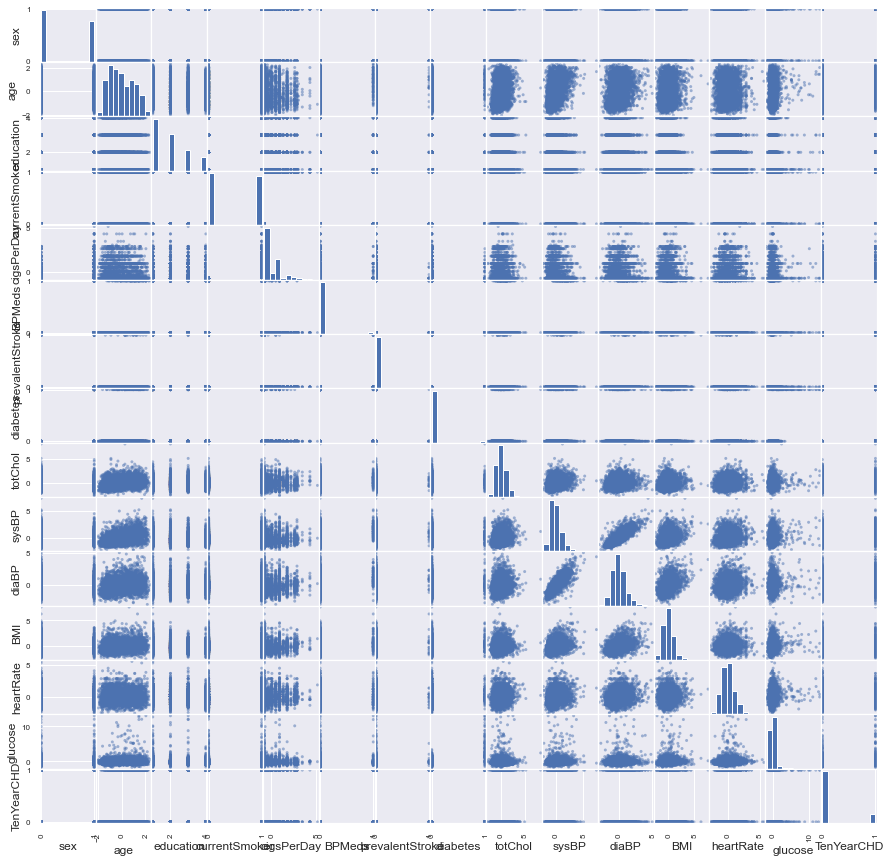

In [306]:
#checking for feature correlation using scatter matrix and heatmap.

scatter_matrix(data[numeric_features], figsize=(15,15))

In [246]:
data.head ()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


C:\Users\umehu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\umehu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


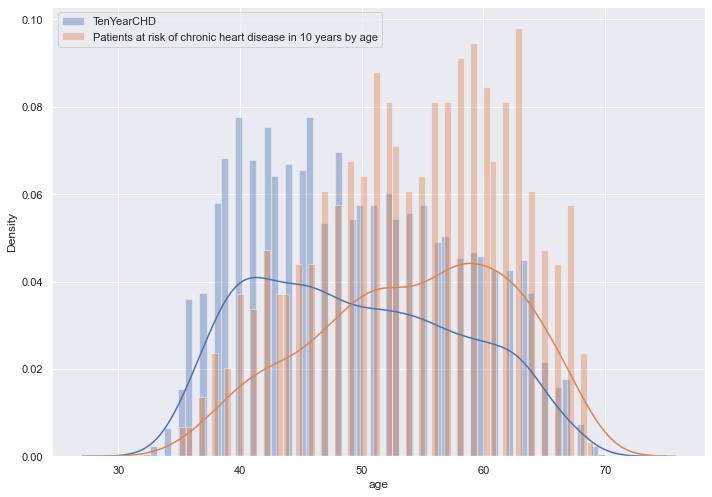

In [247]:
#visualizing the age group of Patients at risk of chronicheart disease in 10 years

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data.age, label = "TenYearCHD", bins=65)
sns.distplot(data.age.loc[data.TenYearCHD == 1], label = "Patients at risk of chronic heart disease in 10 years by age", bins=64)
plt.legend()

In [248]:
subdf1 = data[["sex", "age", "education", "currentSmoker", "cigsPerDay", "BPMeds",
                   "prevalentStroke", "diabetes", "totChol", "sysBP", "diaBP", "BMI",
                    "heartRate", "glucose", ]]


<AxesSubplot:>

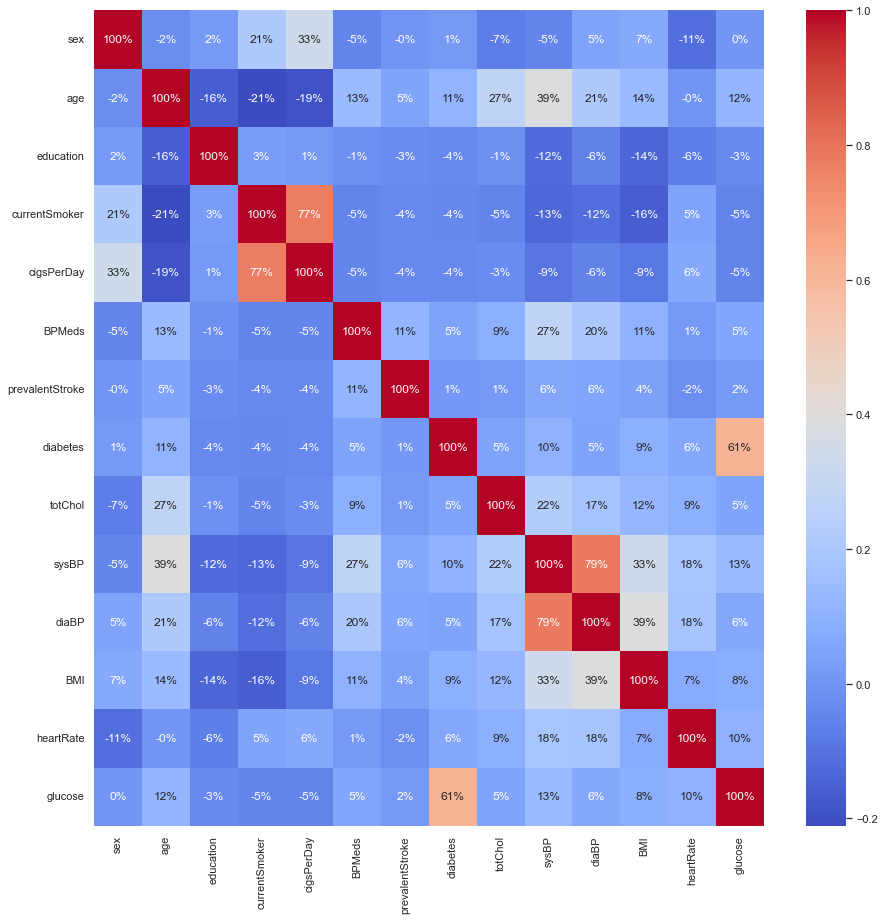

In [249]:
plt.figure(figsize=(15,15))
subdf1_corr = subdf1.corr()
sns.heatmap(data = subdf1_corr, annot = True, cmap = 'coolwarm', fmt='.0%')

### Target Variable Ten Year Risk of CHD

C:\Users\umehu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

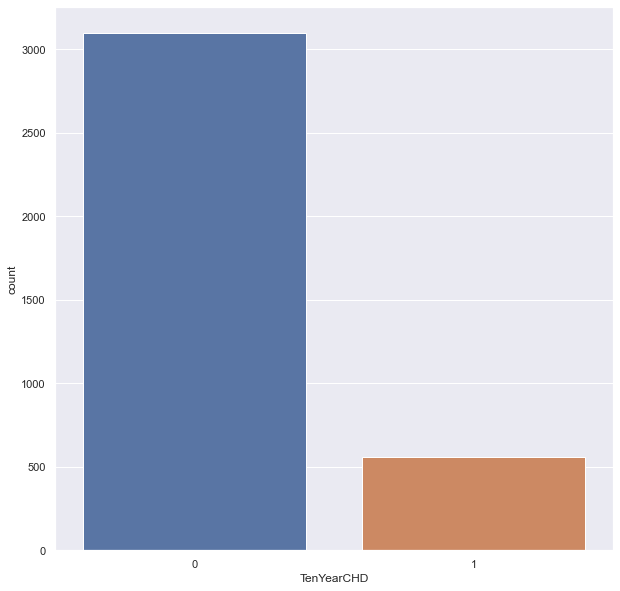

In [250]:
plt.figure(figsize=(10,10))
sns.countplot(data.TenYearCHD)

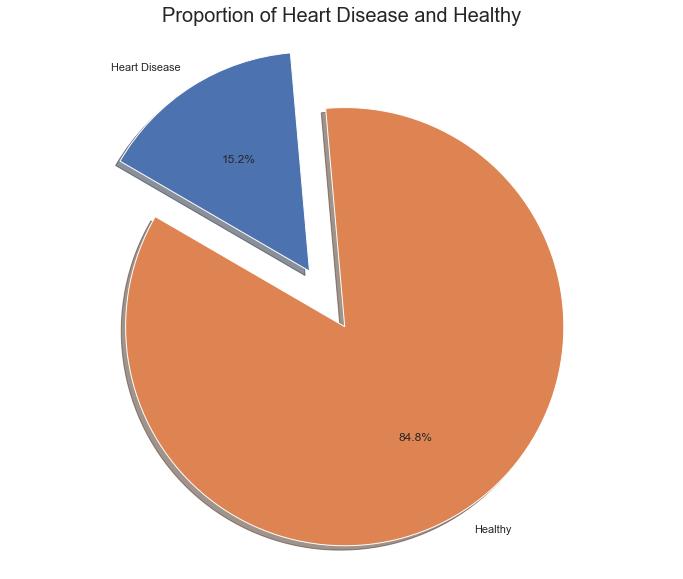

In [251]:
labels = 'Heart Disease', 'Healthy'
sizes = [data.TenYearCHD[data["TenYearCHD"]==1].count(), data.TenYearCHD[data["TenYearCHD"]==0].count()]
explode = (0, 0.3)
fig1, ax1 = plt.subplots(figsize=(12, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=95)
ax1.axis('equal')
plt.title("Proportion of Heart Disease and Healthy", size = 20)
plt.show()

Text(0.5, 1.0, 'correlation between prevalent stroke and BMI')

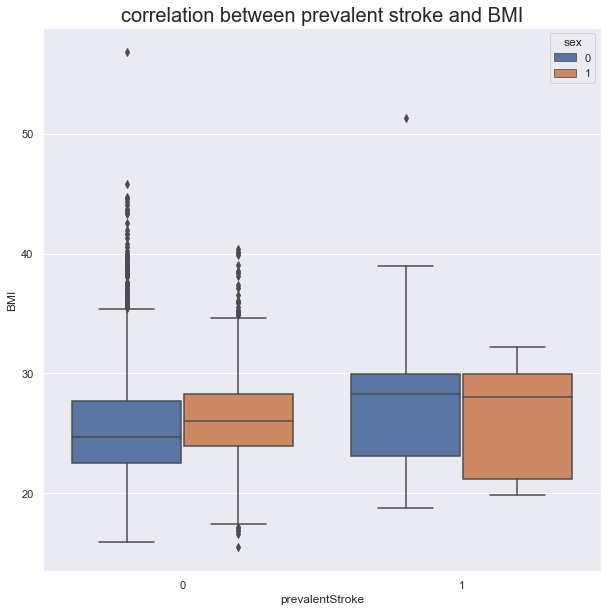

In [252]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'prevalentStroke', y = 'BMI', data = data, hue = 'sex')
plt.title("correlation between prevalent stroke and BMI", size = 20)

Text(0.5, 1.0, 'correlation between current smokers and systolic blood pressure')

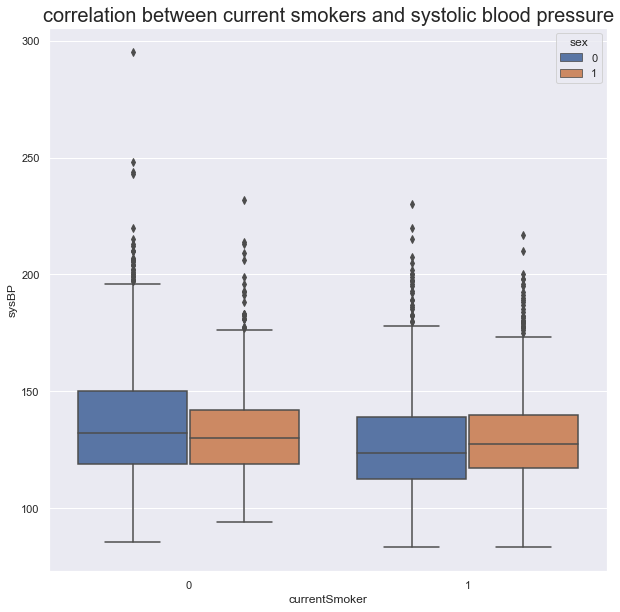

In [253]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'currentSmoker', y = 'sysBP', data = data, hue = 'sex')
plt.title("correlation between current smokers and systolic blood pressure", size = 20)

Text(0.5, 1.0, 'Cholestrol impact on systolic blood pressure for male')

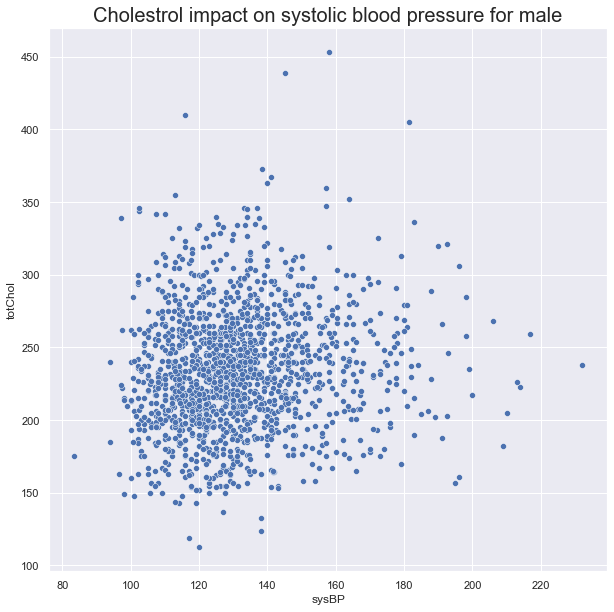

In [254]:
plt.figure(figsize=(10,10))
sns.scatterplot(y = 'totChol', x = 'sysBP',data=data[data.sex==1])
plt.title("Cholestrol impact on systolic blood pressure for male", size = 20)

Text(0.5, 1.0, 'Cholestrol impact on systolic blood pressure for female')

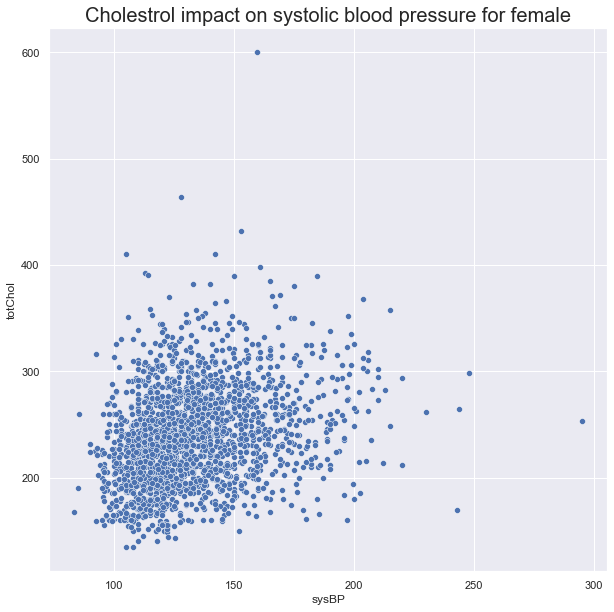

In [255]:
plt.figure(figsize=(10,10))
sns.scatterplot(y = 'totChol', x = 'sysBP',data=data[data.sex==0])
plt.title("Cholestrol impact on systolic blood pressure for female", size = 20)

Text(0.5, 1.0, 'correlation between diabetes and systolic blood pressure')

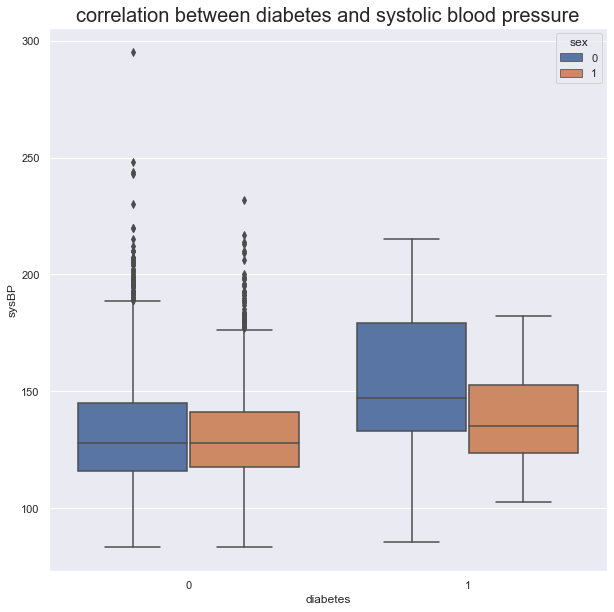

In [256]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'diabetes', y = 'sysBP', data = data, hue = 'sex')
plt.title("correlation between diabetes and systolic blood pressure", size = 20)

Text(0.5, 1.0, 'Hypertension impact on Heart Disase')

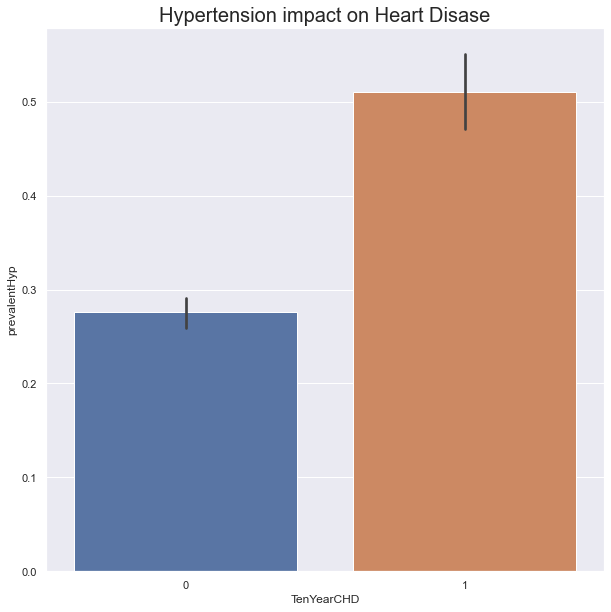

In [257]:
plt.figure(figsize=(10,10))
sns.barplot(x="TenYearCHD",y="prevalentHyp",data=data)

plt.title("Hypertension impact on Heart Disase", size = 20)

Text(0.5, 1.0, 'Diabetes impact on Heart Disase')

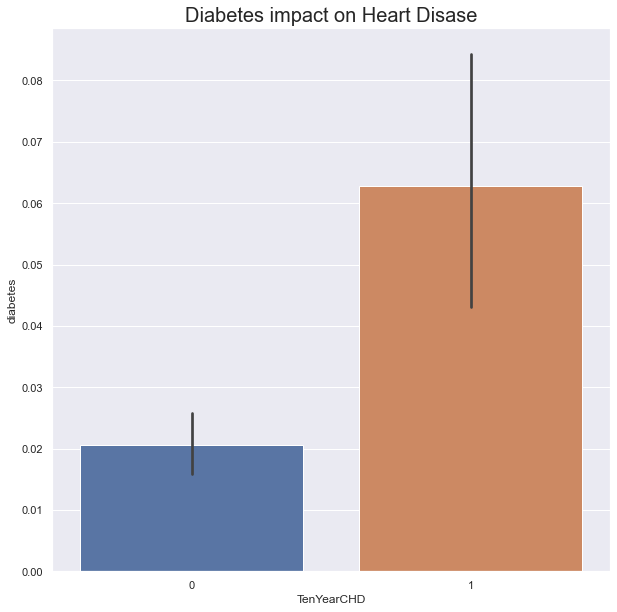

In [258]:
plt.figure(figsize=(10,10))
sns.barplot(x="TenYearCHD",y="diabetes",data=data)

plt.title("Diabetes impact on Heart Disase", size = 20)

### Data Normalization

In [259]:
ss = StandardScaler()
data[["cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose","age"]]= ss.fit_transform(data[["cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose","age"]])
data.head(3)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,-1.233351,4.0,0,-0.757068,0.0,0,0,0,-0.949714,-1.193695,-1.078415,0.291688,0.356340,-0.203127,0
1,0,-0.415591,2.0,0,-0.757068,0.0,0,0,0,0.297729,-0.514637,-0.159695,0.724614,1.608289,-0.244956,0
2,1,-0.181945,1.0,1,0.921174,0.0,0,0,0,0.184325,-0.220378,-0.243215,-0.109261,-0.060977,-0.495930,0


# Spliting the dataset into training and testing dataset

##### Train size = 70%

##### Test size = 30%

In [260]:
#splitting data into training and testing set with a random split. 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [261]:
#length of the training and testing data

len(X_train), len(X_test)

(2559, 1097)

In [313]:
# For reproducibility.
seed = 7

In [316]:
# create cross-validation splits
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [328]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2559, 15)
(1097, 15)
(2559,)
(1097,)


# Training and Evaluating the Models



### 1. Logistics Regression

In [339]:
#Creating and instance of the logistics regression model

log_reg = LogisticRegression(solver='lbfgs', random_state=0, max_iter=1000)

# training the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [340]:
y_pred = log_reg.predict(X_test)
print('Train Score is : ' , log_reg.score(X_train, y_train))
print('Test Score is : ' , log_reg.score(X_test, y_test))

Train Score is :  0.8569753810082064
Test Score is :  0.8468550592525068


In [341]:
print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       923
           1       0.61      0.10      0.17       174

    accuracy                           0.85      1097
   macro avg       0.73      0.54      0.54      1097
weighted avg       0.81      0.85      0.80      1097



The accuracy score is: 0.8468550592525068

 Confusion matrix 
 
 [[912  11]
 [157  17]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       923
           1       0.61      0.10      0.17       174

    accuracy                           0.85      1097
   macro avg       0.73      0.54      0.54      1097
weighted avg       0.81      0.85      0.80      1097



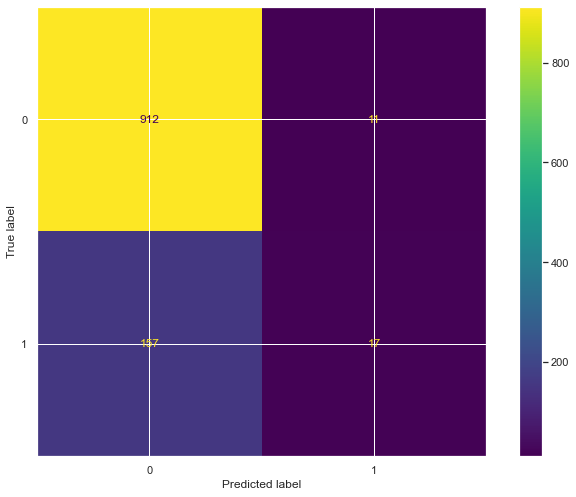

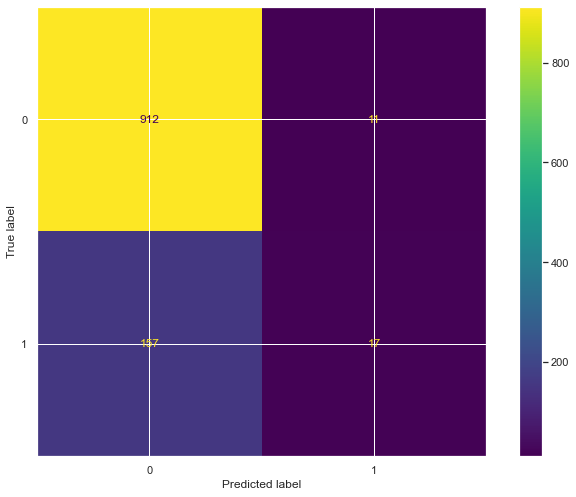

In [342]:
# accuracy score
print('The accuracy score is:', accuracy_score(y_test, y_pred)) 

# Confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))



# old plotting method
plot_confusion_matrix(log_reg, X_test, y_test) 
plt.show()

 # new plotting method 
disp = ConfusionMatrixDisplay(cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()

In [343]:
size = metrics.roc_auc_score(y_test, y_pred)
print(size)

0.5428917448101518


Text(0.5, 1.0, 'Logistics regression ROC curve predicting heart disease')

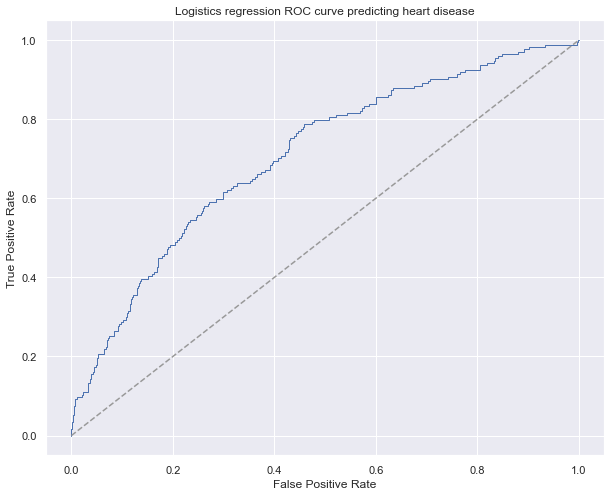

In [344]:
plt.figure(figsize=(10,8))
probas_ = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistics regression ROC curve predicting heart disease')

### 2. Support Vector Machine

In [346]:
#Creating and instance of support vector machine

svm = SVC(probability=True) 

# training the model

svm.fit(X_train, y_train)

SVC(probability=True)

In [347]:
y_pred = svm.predict(X_test)
print('Train Score is : ' , svm.score(X_train, y_train))
print('Test Score is : ' , svm.score(X_test, y_test))

Train Score is :  0.8569753810082064
Test Score is :  0.8404740200546946


In [271]:
print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       923
           1       0.44      0.02      0.04       174

    accuracy                           0.84      1097
   macro avg       0.64      0.51      0.48      1097
weighted avg       0.78      0.84      0.78      1097



The accuracy score is: 0.8404740200546946

 Confusion matrix 
 
 [[918   5]
 [170   4]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       923
           1       0.44      0.02      0.04       174

    accuracy                           0.84      1097
   macro avg       0.64      0.51      0.48      1097
weighted avg       0.78      0.84      0.78      1097



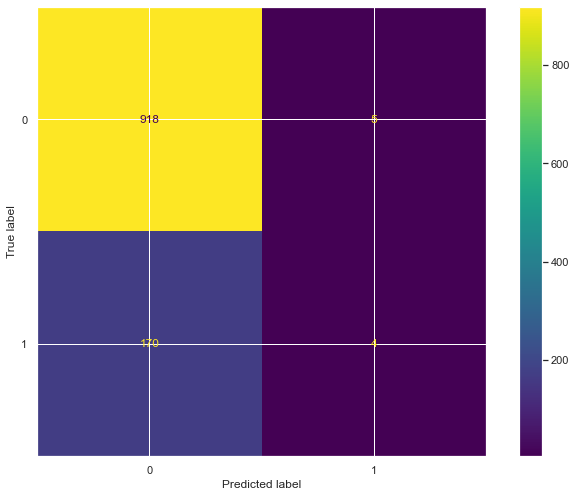

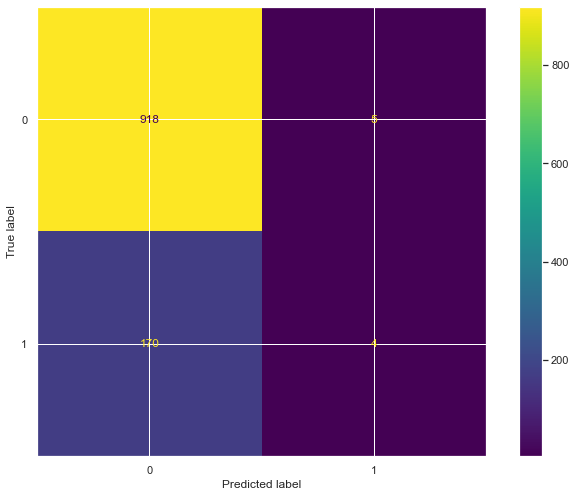

In [272]:
 # accuracy score
    
print('The accuracy score is:', accuracy_score(y_test, y_pred))

# Confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))

# old plotting method
plot_confusion_matrix(svm, X_test, y_test) 
plt.show()

# new plotting method 
disp = ConfusionMatrixDisplay(cm, display_labels=svm.classes_) 
disp.plot()
plt.show()

In [273]:
size = metrics.roc_auc_score(y_test, y_pred)
print(size)

0.508785693826976


Text(0.5, 1.0, 'Support vector machine curve for predicting heart disease')

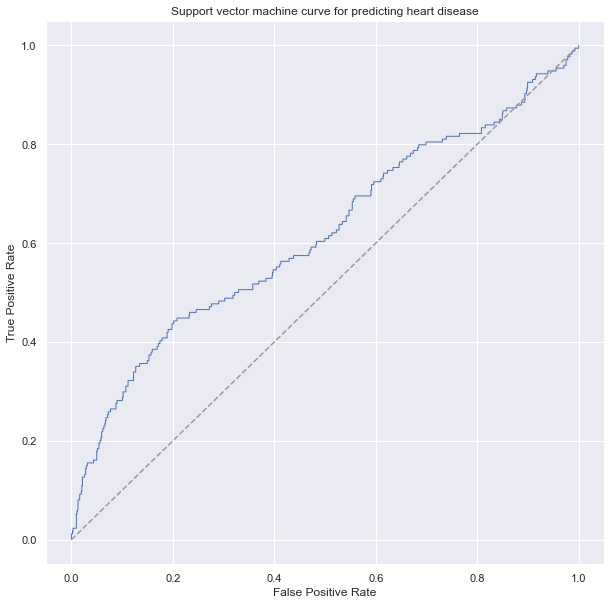

In [274]:
plt.figure(figsize=(10,10))
probas_ = svm.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support vector machine curve for predicting heart disease')

### 3. K-Nearest Neighbors (KNN)

In [365]:
# Build the model

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [276]:
y_pred = knn.predict(X_test)
print('Train Score is : ' , knn.score(X_train, y_train))
print('Test Score is : ' , knn.score(X_test, y_test))

Train Score is :  0.8663540445486518
Test Score is :  0.8258887876025525


In [277]:
print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       923
           1       0.33      0.09      0.14       174

    accuracy                           0.83      1097
   macro avg       0.59      0.53      0.52      1097
weighted avg       0.77      0.83      0.78      1097



The accuracy score is: 0.8258887876025525

 Confusion matrix 
 
 [[890  33]
 [158  16]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       923
           1       0.33      0.09      0.14       174

    accuracy                           0.83      1097
   macro avg       0.59      0.53      0.52      1097
weighted avg       0.77      0.83      0.78      1097



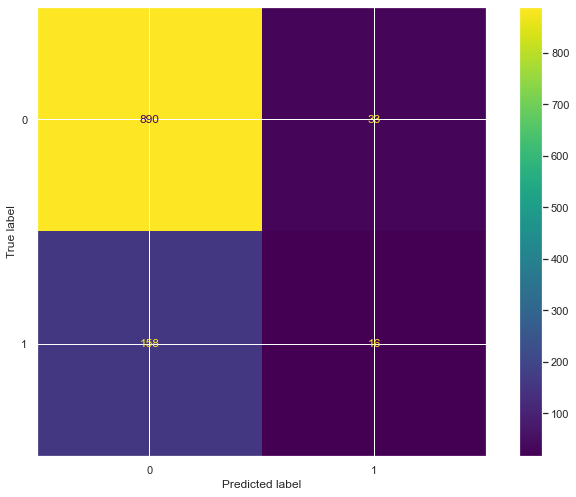

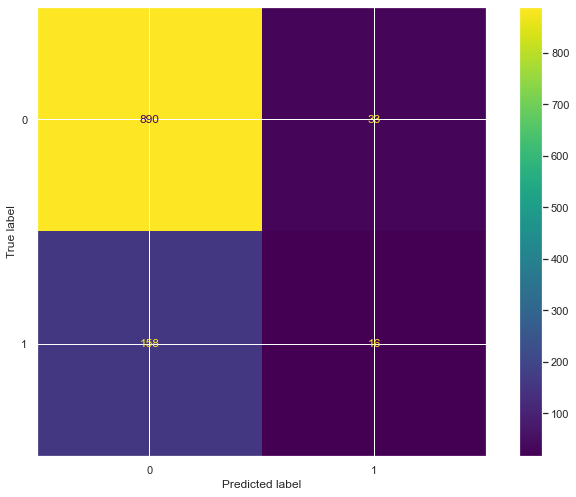

In [278]:
# accuracy score

print('The accuracy score is:', accuracy_score(y_test, y_pred)) 

# Confusion matrix 

cm = confusion_matrix(y_test, y_pred) 
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))

# old plotting method

plot_confusion_matrix(knn, X_test, y_test) 
plt.show()

# new plotting method 

disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_) 
disp.plot()
plt.show()

In [279]:
size = metrics.roc_auc_score(y_test, y_pred)
print(size)

0.5281005217867772


Text(0.5, 1.0, 'K-Nearest Neigbour Curve for predicting heart disease')

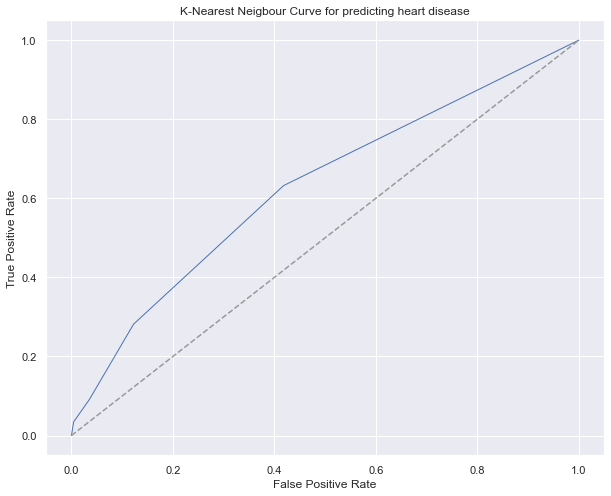

In [280]:
plt.figure(figsize=(10,8))
probas_ = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neigbour Curve for predicting heart disease')

### 4. Random forest classifier

In [356]:
#Creating an instance of the Random forest classifier
rfc = RandomForestClassifier(random_state=0, max_depth=1)

#Training the model on the training set
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, random_state=0)

In [357]:
y_pred = rfc.predict(X_test)
print('Train Score is : ' , rfc.score(X_train, y_train))
print('Test Score is : ' , rfc.score(X_test, y_test))

Train Score is :  0.8503321610003908
Test Score is :  0.8413855970829535


In [358]:
print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       923
           1       0.00      0.00      0.00       174

    accuracy                           0.84      1097
   macro avg       0.42      0.50      0.46      1097
weighted avg       0.71      0.84      0.77      1097



C:\Users\umehu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\umehu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\umehu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy score is: 0.8413855970829535

 Confusion matrix 
 
 [[923   0]
 [174   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       923
           1       0.00      0.00      0.00       174

    accuracy                           0.84      1097
   macro avg       0.42      0.50      0.46      1097
weighted avg       0.71      0.84      0.77      1097



C:\Users\umehu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\umehu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\umehu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


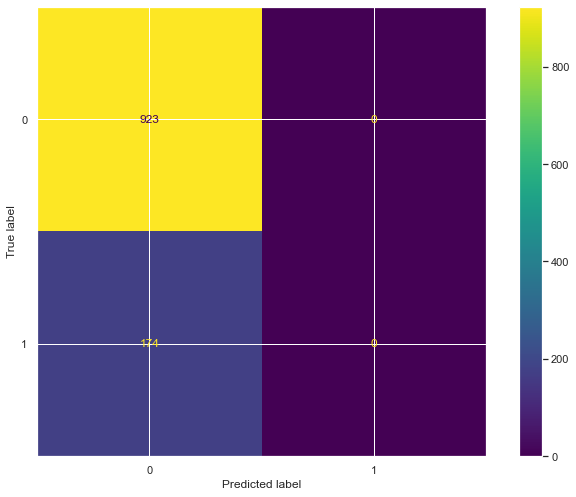

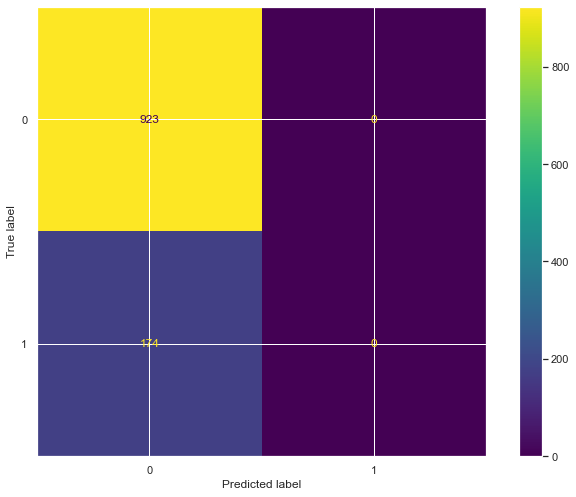

In [359]:
# accuracy score

print('The accuracy score is:', accuracy_score(y_test, y_pred)) 

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)  
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))

# old plotting method
plot_confusion_matrix(rfc, X_test, y_test) 
plt.show()

# new plotting method 
disp = ConfusionMatrixDisplay(cm, display_labels=rfc.classes_) 
disp.plot()
plt.show()

In [362]:
size = metrics.roc_auc_score(y_test, y_pred)
print(size)

0.5


Text(0.5, 1.0, 'Random forest curve for predicting heart disease')

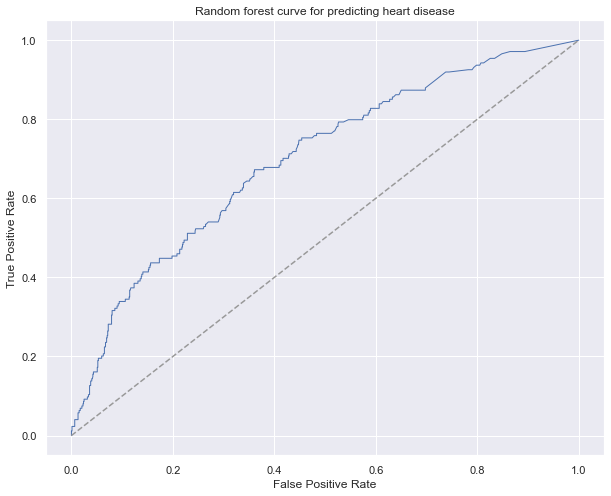

In [363]:
plt.figure(figsize=(10,8))
probas_ = rfc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest curve for predicting heart disease')

### 5. MLP Classifer Neural Network

In [351]:
#Creating an Instance of the Multilayer Perceptron classifier
mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=0, solver='lbfgs')

In [288]:
y_pred = mlp.predict(X_test)
print('Train Score is : ' , knn.score(X_train, y_train))
print('Test Score is : ' , knn.score(X_test, y_test))

Train Score is :  0.8663540445486518
Test Score is :  0.8258887876025525


In [289]:
print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       923
           1       0.24      0.24      0.24       174

    accuracy                           0.76      1097
   macro avg       0.55      0.55      0.55      1097
weighted avg       0.76      0.76      0.76      1097



The accuracy score is: 0.7611668185961714

 Confusion matrix 
 
 [[794 129]
 [133  41]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       923
           1       0.24      0.24      0.24       174

    accuracy                           0.76      1097
   macro avg       0.55      0.55      0.55      1097
weighted avg       0.76      0.76      0.76      1097



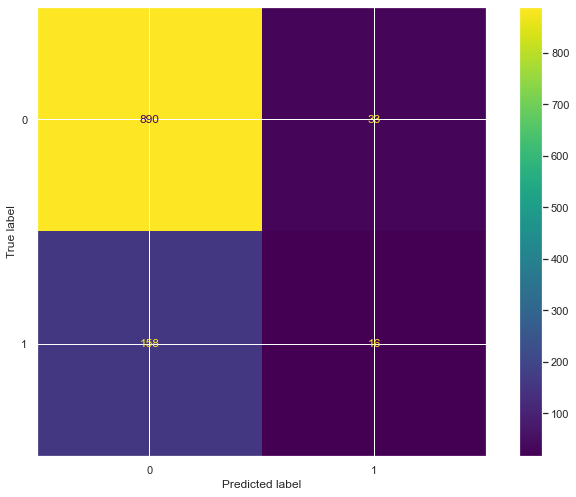

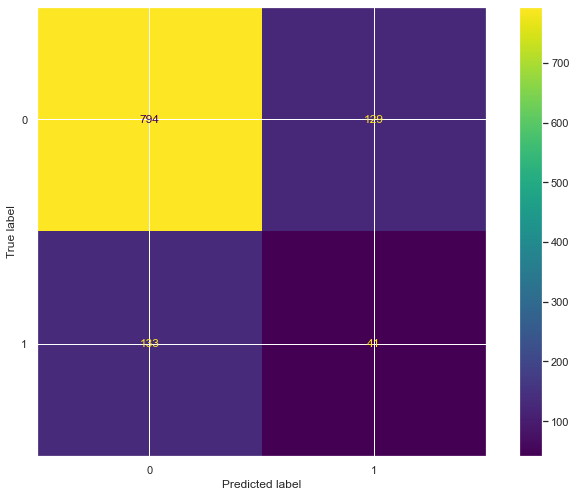

In [290]:

# accuracy score

print('The accuracy score is:', accuracy_score(y_test, y_pred)) 

# Confusion matrix 

cm = confusion_matrix(y_test, y_pred) 
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))

# old plotting method

plot_confusion_matrix(knn, X_test, y_test) 
plt.show()

# new plotting method 

disp = ConfusionMatrixDisplay(cm, display_labels=mlp.classes_) 
disp.plot()
plt.show()

In [291]:
size = metrics.roc_auc_score(y_test, y_pred)
print(size)

0.5479352685520729


Text(0.5, 1.0, 'MLP Classifer Neural Network Curve for predicting heart disease')

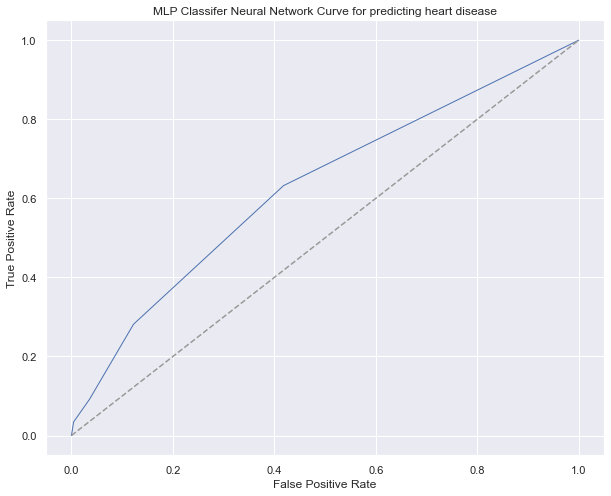

In [292]:
plt.figure(figsize=(10,8))
probas_ = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Classifer Neural Network Curve for predicting heart disease')